In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy 
numpy.random.seed(416)

In [4]:
data = pd.read_csv("book_source/source/regression/linear_regression/home_data.csv")
features, labels = data.loc[:, data.columns != "price"], data["price"]
train_features, val_features, train_labels, val_labels = train_test_split(features, labels, test_size=0.01)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [39]:
import itertools
import random

FEATURES = [
    "bathrooms",
    "bedrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "yr_built",
    "yr_renovated",
    "waterfront"
]

FEATURES = list(data.columns[~data.columns.isin(["price", "id", "date"])])

def all_subsets(values, include_empty=False, limit_per_size=None):
    start = 0 if include_empty else 1
    for i in range(start, len(values)):
        subsets = list(itertools.combinations(values, i))
        random.shuffle(subsets)
        
        if limit_per_size:
            subsets = subsets[:min(len(subsets), limit_per_size)]
        
        for subset in subsets:
            yield list(subset)

ALL_SUBSETS = list(all_subsets(FEATURES))#, limit_per_size=50))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 262142/262142 [52:25<00:00, 83.34it/s]


3145.4511981010437


<AxesSubplot:xlabel='size', ylabel='mse'>

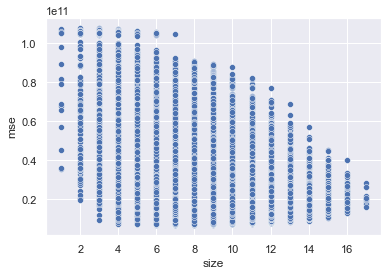

In [40]:
from tqdm import tqdm

evaluation_data = []

with tqdm(ALL_SUBSETS) as t:
    for subset in t:
        subset_train_features = train_features[subset]
        subset_val_features = val_features[subset]

        model = LinearRegression()
        model.fit(subset_train_features, train_labels)

        val_predictions = model.predict(subset_val_features)
        mse = mean_squared_error(val_labels, val_predictions)

        evaluation_data.append({"size": len(subset), "mse": mse})
    print(t.format_dict['elapsed'])
    
evaluation_data = pd.DataFrame(evaluation_data)

import seaborn as sns
sns.set()

#evaluation_data = evaluation_data[evaluation_data["mse"] < 60000000000]
sns.scatterplot(data=evaluation_data, x="size", y="mse")

